In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data = pd.read_csv('/content/IMDB Dataset.csv')
data.shape

(50000, 2)

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.nunique()

review       49582
sentiment        2
dtype: int64

In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

Text(0.5, 1.0, 'count of type of sentiment')

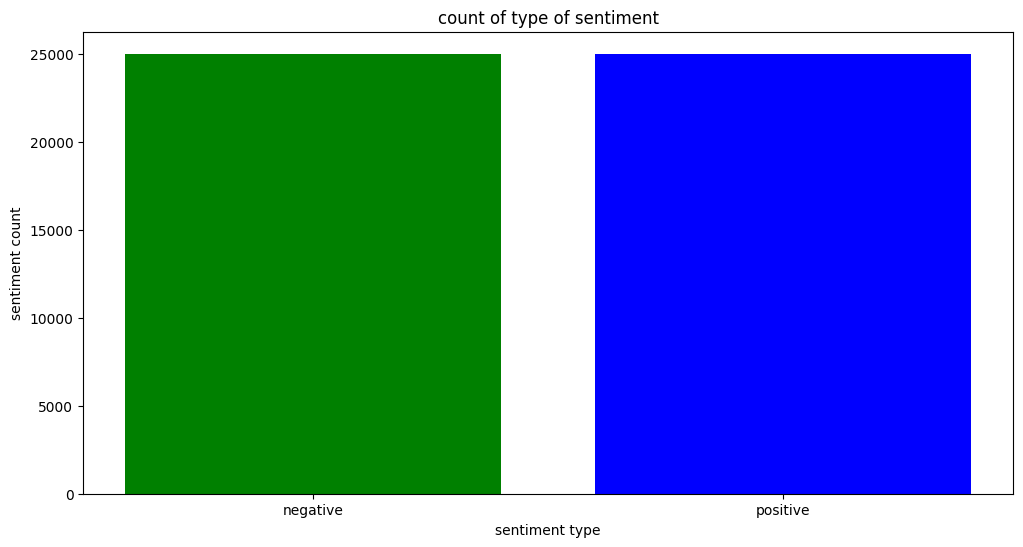

In [7]:
counter = data.sentiment.value_counts()
index = [1, 2]
plt.figure(1, figsize = (12, 6))
plt.bar(index, counter, color = ['green', 'blue'])
plt.xticks(index, ['negative', 'positive'], rotation = 0)
plt.xlabel('sentiment type')
plt.ylabel('sentiment count')
plt.title('count of type of sentiment')

In [8]:
data['review'] = data['review'].map(lambda x: x.lower())
data['review'] = data['review'].map(lambda x: re.sub('[^a-z0-9\s]', '', x))

data['review'] = data['review'].str.replace(r'@\S+', '', regex=True)

In [9]:
from wordcloud import WordCloud,STOPWORDS

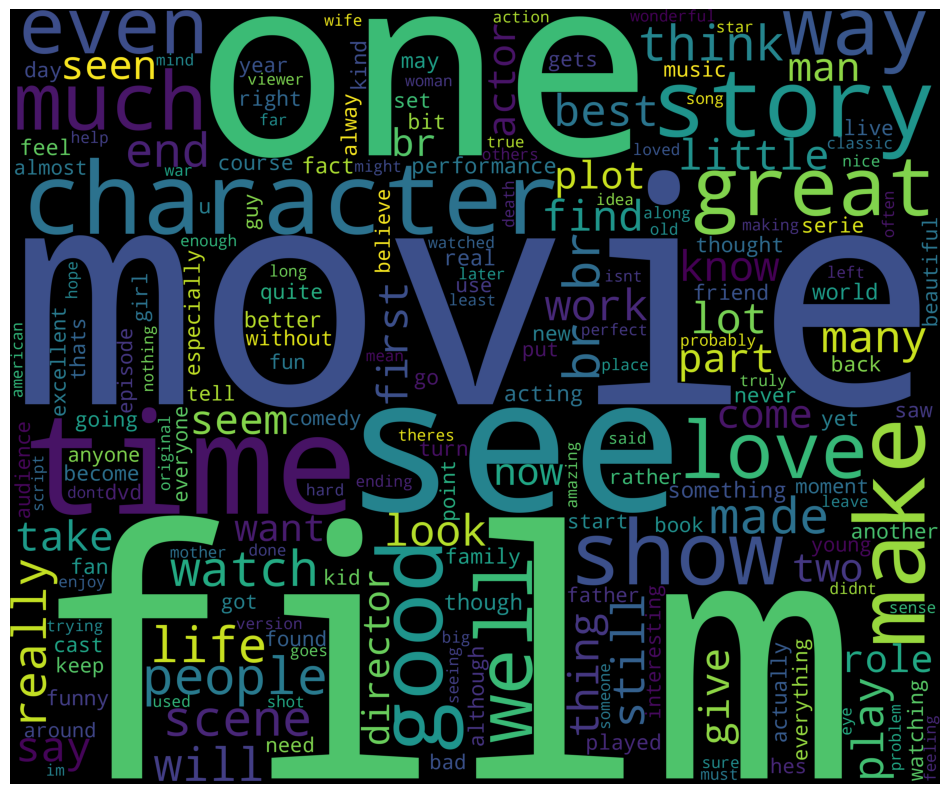

In [10]:
new_df=data[data['sentiment']=='positive']
words = ' '.join(new_df['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

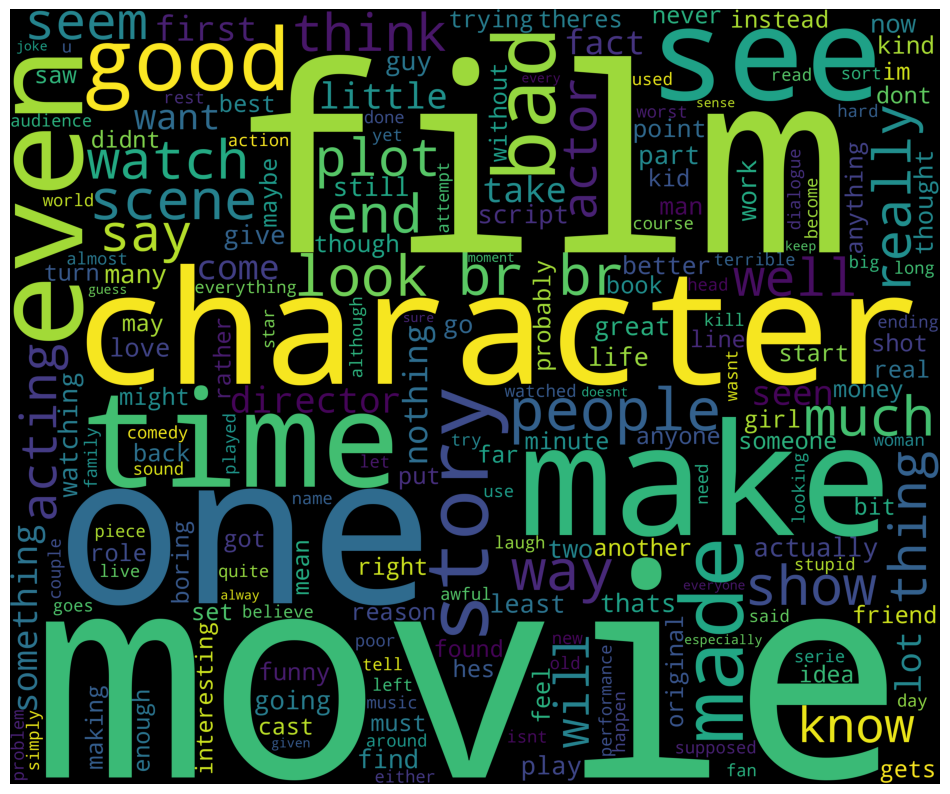

In [11]:
new_df=data[data['sentiment']=='negative']
words = ' '.join(new_df['review'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['sentiment'])

data['sentiment_encoded'] = le.transform(data['sentiment'])
data.head()

,review,sentiment,sentiment_encoded
0,one of the other reviewers has mentioned that ...,positive,1
1,a wonderful little production br br the filmin...,positive,1
2,i thought this was a wonderful way to spend ti...,positive,1
3,basically theres a family where a little boy j...,negative,0
4,petter matteis love in the time of money is a ...,positive,1


In [13]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

In [14]:
nltk.download('stopwords')
data['clean_tweet']=data['review'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
x = data.clean_tweet
y = data.sentiment

print(len(x), len(y))

50000 50000


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

37500 37500
12500 12500


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [18]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [19]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm[0:1000], y_train[0:1000])
pred = model.predict(x_test_dtm[0:200])

In [22]:
accuracy_score(y_test[0:200],pred)

0.755

In [23]:
cm = confusion_matrix(y_test[0:200], pred)
cm

array([[73, 22],
       [27, 78]])

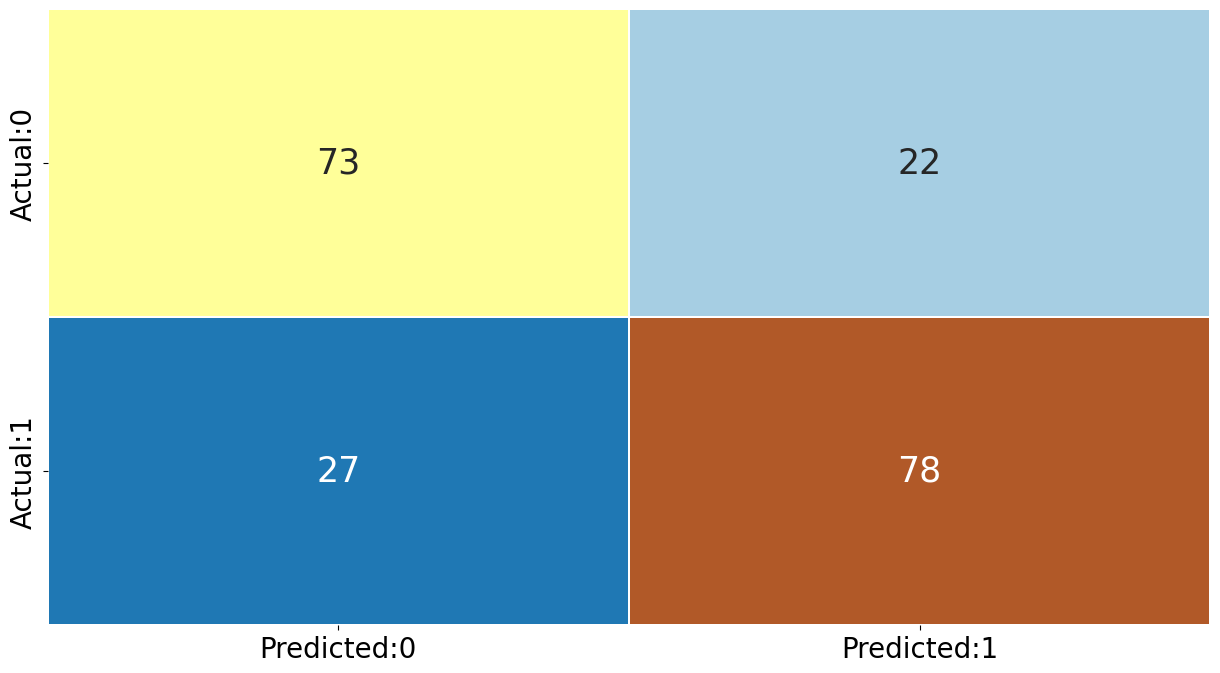

In [24]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [25]:
print(classification_report(y_test[0:200],pred))

              precision    recall  f1-score   support

    negative       0.73      0.77      0.75        95
    positive       0.78      0.74      0.76       105

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



In [27]:
x_train_dtm = x_train_dtm[0:1000]
y_train = y_train[0:1000]
x_test_dtm = x_test_dtm[0:200]
y_test = y_test[0:200]

In [28]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train_dtm, y_train)
pred2 = model2.predict(x_test_dtm)

In [29]:
accuracy_score(y_test,pred2)

0.735

In [30]:
cm2 = confusion_matrix(y_test, pred2)
cm2

array([[87,  8],
       [45, 60]])

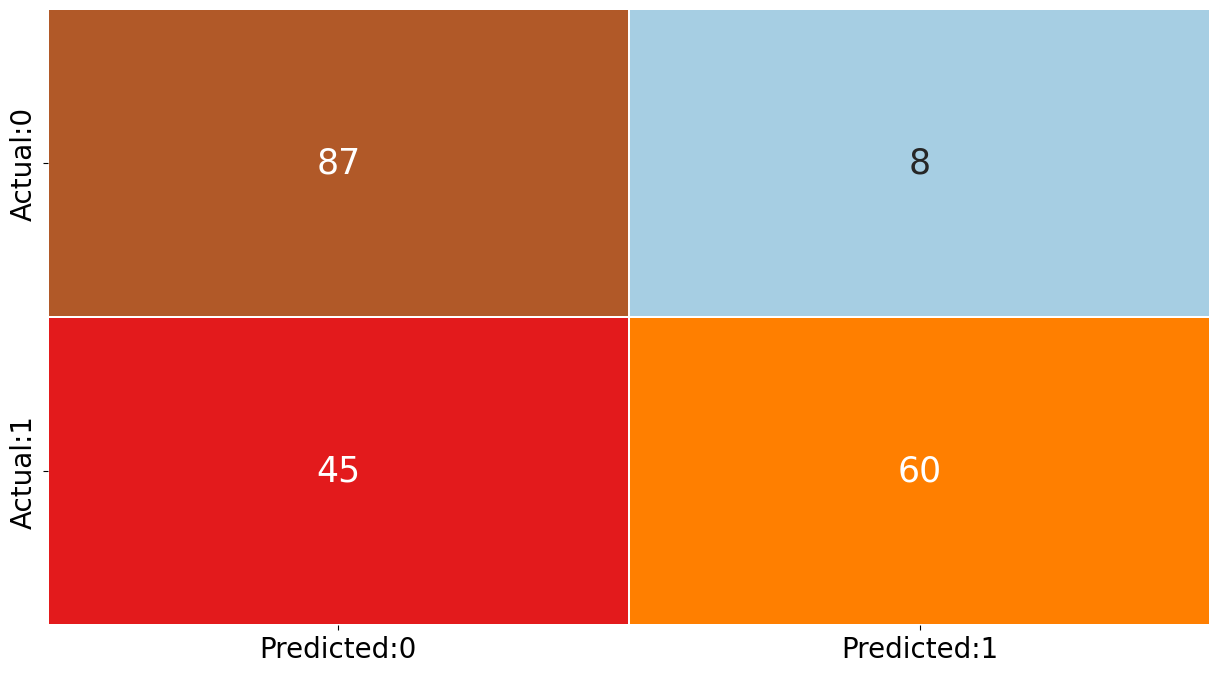

In [31]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()

model3.fit(x_train_dtm, y_train)
pred3 = model3.predict(x_test_dtm)

In [33]:
accuracy_score(y_test,pred3)

0.785

In [34]:
cm3 = confusion_matrix(y_test, pred2)
cm3

array([[87,  8],
       [45, 60]])

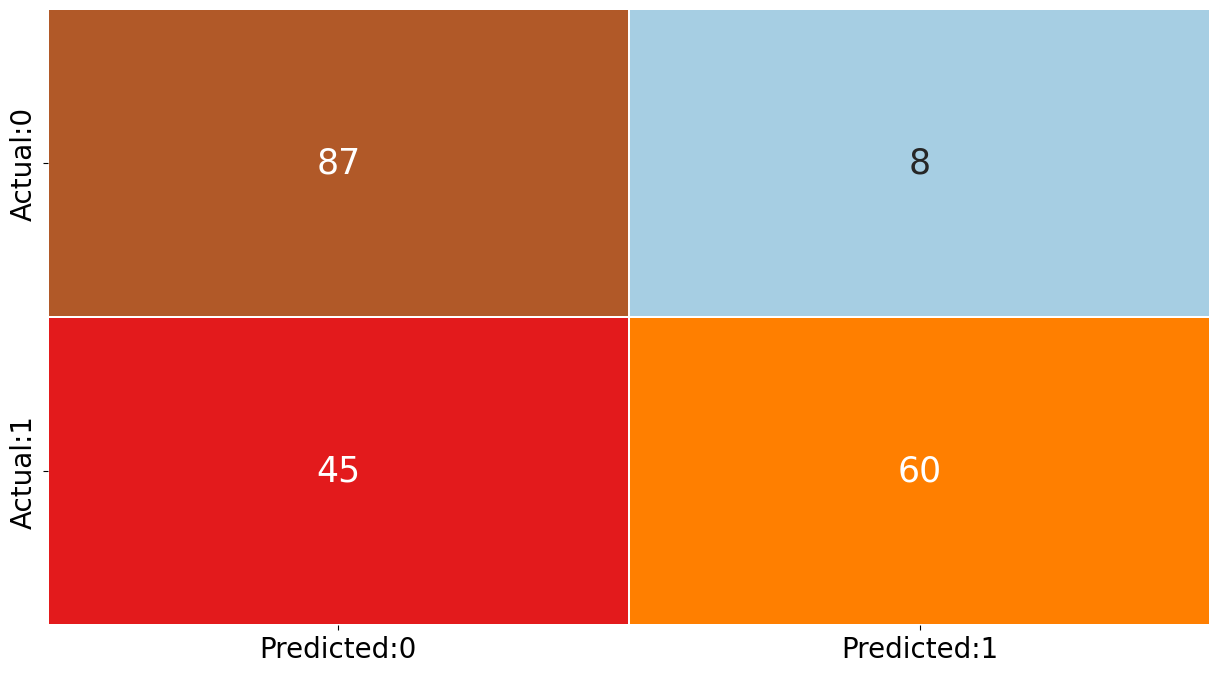

In [35]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm3,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [37]:
tokenizer = Tokenizer(num_words = 2000, split = ' ')
tokenizer.fit_on_texts(data['review'].values)

X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

In [38]:
model4 = Sequential()
model4.add(Embedding(2000, 128,input_length = X.shape[1]))
model4.add(SpatialDropout1D(0.4))
model4.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model4.add(Dense(2,activation='softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

print(model4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1862, 128)         256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 1862, 128)         0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511194 (1.95 MB)
Trainable params: 511194 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [39]:
y = pd.get_dummies(data['sentiment']).values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, shuffle=True)
# print X , y Shape
x_train = X_train[0:100]
y_train = y_train[0:100]
x_test = X_test[0:20]
y_test = y_test[0:20]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(100, 1862) (100, 2)
(20, 1862) (20, 2)


In [43]:
history = model4.fit(x_train, y_train, epochs = 20, batch_size= 4, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20
25/25 [==============================] - 187s 7s/step - loss: 0.6931 - accuracy: 0.4900 - val_loss: 0.6821 - val_accuracy: 0.6000
Epoch 2/20
25/25 [==============================] - 181s 7s/step - loss: 0.6345 - accuracy: 0.6100 - val_loss: 5.4298 - val_accuracy: 0.6000
Epoch 3/20
25/25 [==============================] - 182s 7s/step - loss: 1.9100 - accuracy: 0.4500 - val_loss: 0.6736 - val_accuracy: 0.6000
Epoch 4/20
25/25 [==============================] - 182s 7s/step - loss: 0.6659 - accuracy: 0.6200 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 5/20
25/25 [==============================] - 183s 7s/step - loss: 0.6254 - accuracy: 0.8200 - val_loss: 0.6717 - val_accuracy: 0.6000
Epoch 6/20
25/25 [==============================] - 184s 7s/step - loss: 0.5777 - accuracy: 0.7100 - val_loss: 0.6662 - val_accuracy: 0.6000
Epoch 7/20
25/25 [==============================] - 183s 7s/step - loss: 0.4261 - accuracy: 0.9200 - val_loss: 0.6474 - val_accuracy: 0.5500
Epoch 8/20
25

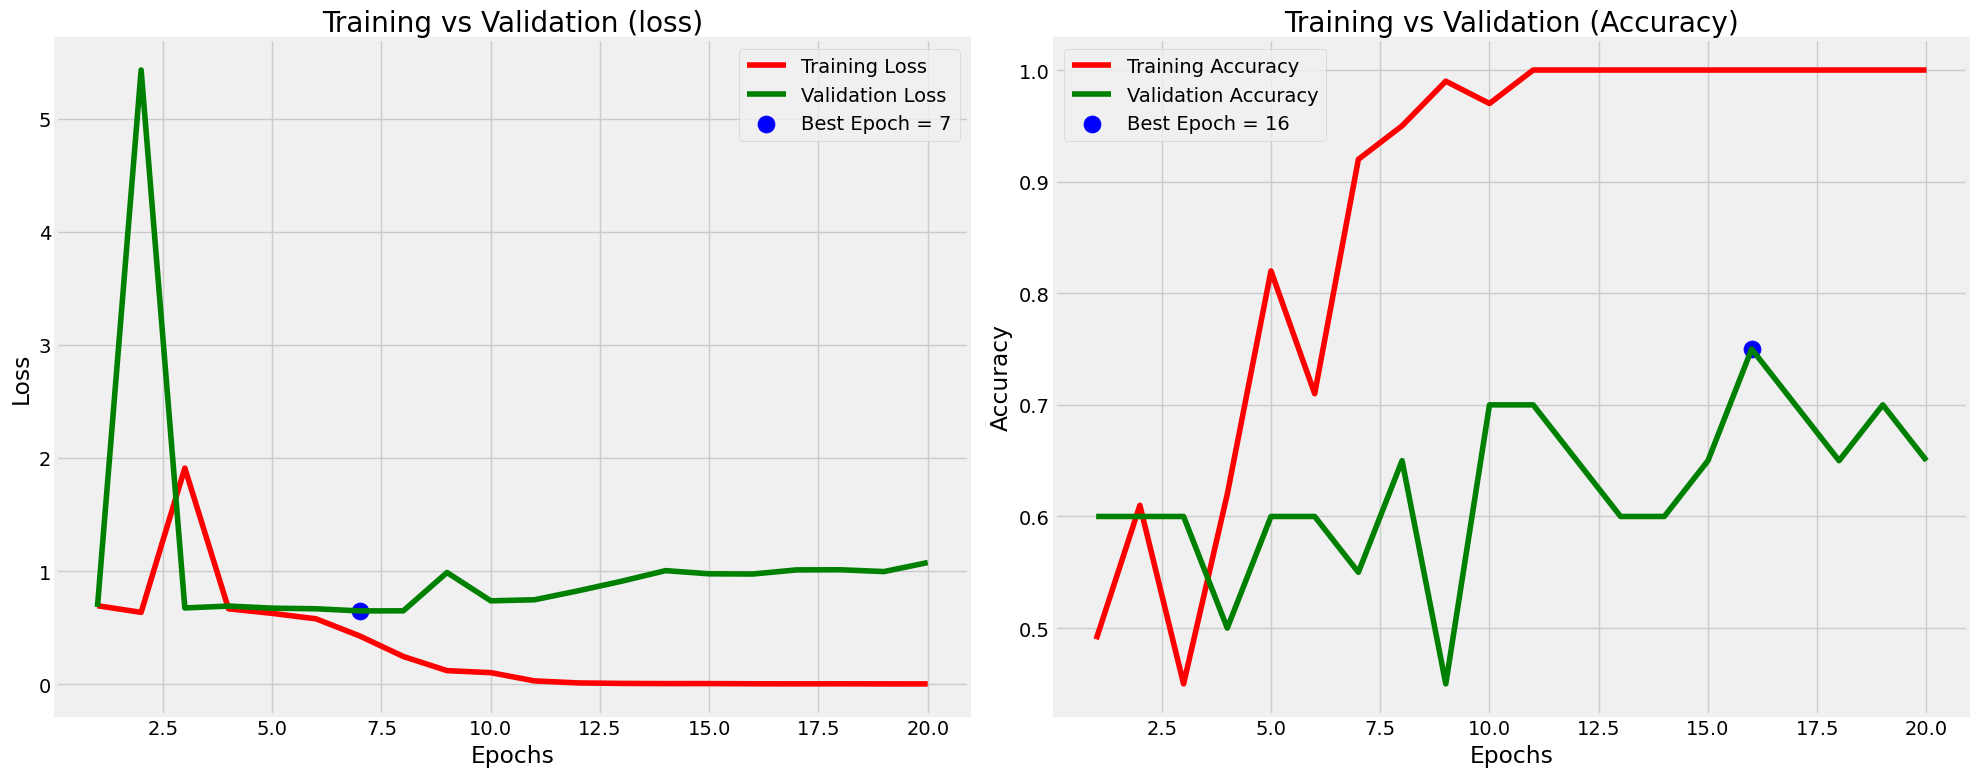

In [44]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
score, acc = model4.evaluate(x_test, y_test, batch_size = 4, verbose=0)

print('Score: {:.2f}'.format(score))
print('Accuracy: {:.2f}'.format(acc))

Score: 1.07
Accuracy: 0.65


In [46]:
from keras.layers import GRU, SpatialDropout1D

model5 = Sequential()
model5.add(Embedding(2000, 128,input_length = X.shape[1]))
model5.add(SpatialDropout1D(0.4))
model5.add(GRU(196, dropout=0.2, recurrent_dropout=0.2))
model5.add(Dense(2,activation='softmax'))

model5.compile(loss = 'mse', optimizer='adam',metrics = ['accuracy'])

print(model5.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1862, 128)         256000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 1862, 128)         0         
 alDropout1D)                                                    
                                                                 
 gru (GRU)                   (None, 196)               191688    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 448082 (1.71 MB)
Trainable params: 448082 (1.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
history2 = model5.fit(x_train, y_train, epochs = 20, batch_size= 4, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20
25/25 [==============================] - 165s 6s/step - loss: 0.2548 - accuracy: 0.5000 - val_loss: 0.2438 - val_accuracy: 0.6000
Epoch 2/20
25/25 [==============================] - 159s 6s/step - loss: 0.2366 - accuracy: 0.6600 - val_loss: 0.2452 - val_accuracy: 0.6500
Epoch 3/20
25/25 [==============================] - 159s 6s/step - loss: 0.1751 - accuracy: 0.8400 - val_loss: 0.2725 - val_accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - 158s 6s/step - loss: 0.0598 - accuracy: 0.9400 - val_loss: 0.2973 - val_accuracy: 0.6000
Epoch 5/20
25/25 [==============================] - 158s 6s/step - loss: 0.0213 - accuracy: 0.9800 - val_loss: 0.3374 - val_accuracy: 0.5500
Epoch 6/20
25/25 [==============================] - 169s 7s/step - loss: 0.0341 - accuracy: 0.9600 - val_loss: 0.3055 - val_accuracy: 0.6000
Epoch 7/20
25/25 [==============================] - 173s 7s/step - loss: 0.0087 - accuracy: 0.9900 - val_loss: 0.2921 - val_accuracy: 0.6000
Epoch 8/20
25

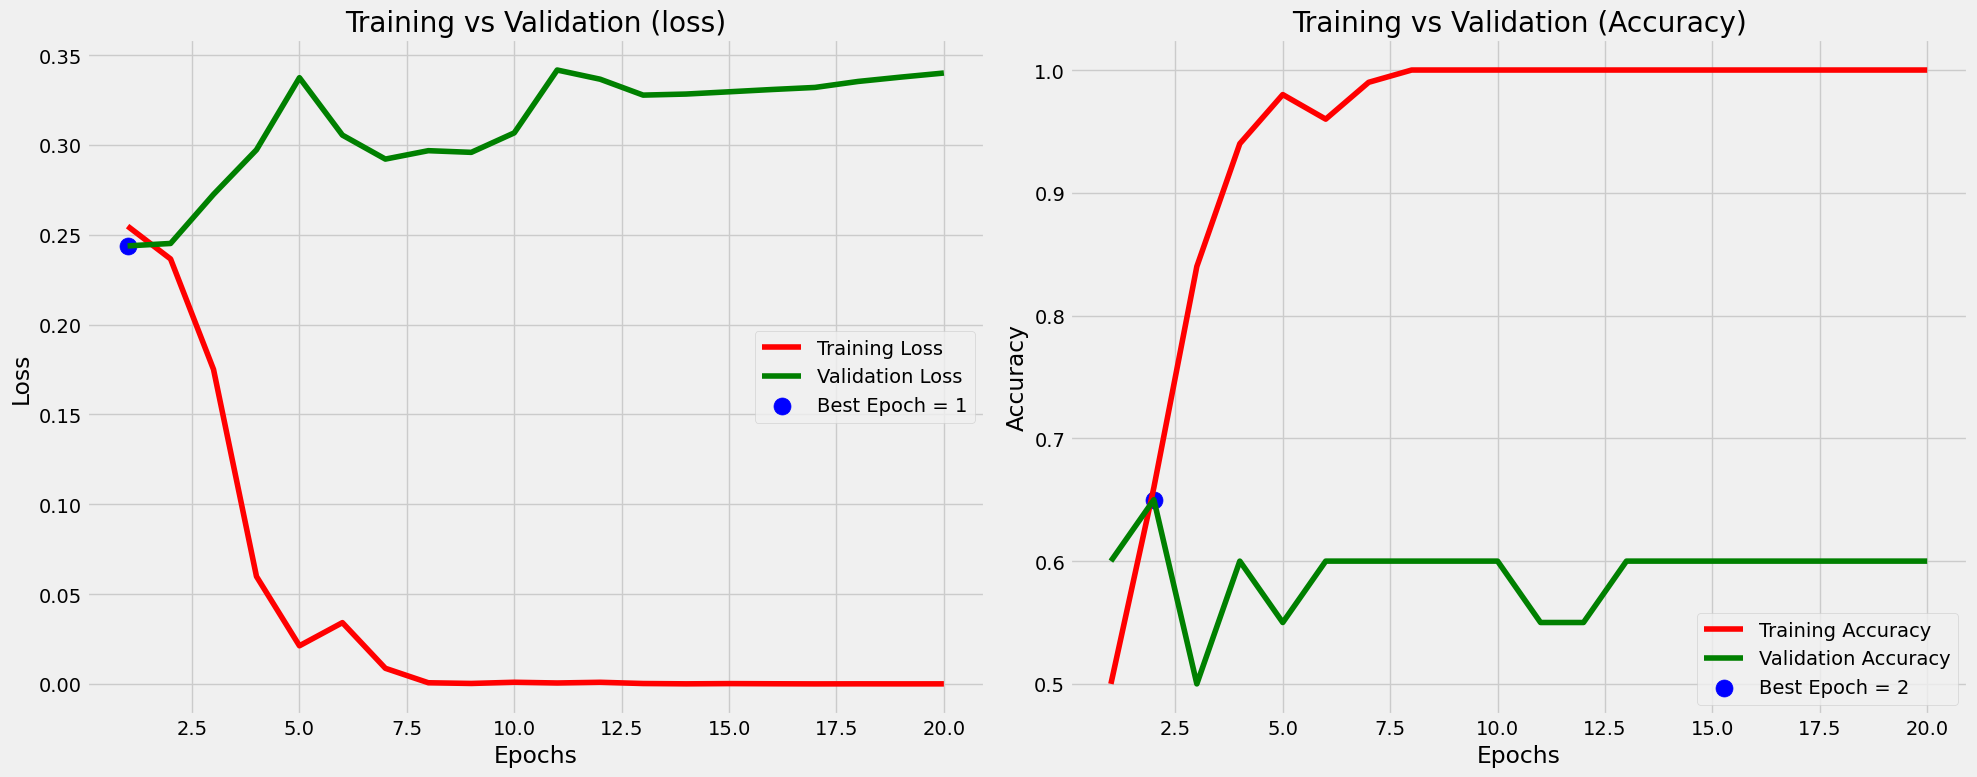

In [48]:
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']

val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()